
--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     100 non-null    int64         
 1   Date        100 non-null    datetime64[ns]
 2   Product     100 non-null    object        
 3   Category    100 non-null    object        
 4   Region      100 non-null    object        
 5   CustomerID  100 non-null    int64         
 6   Quantity    100 non-null    int64         
 7   UnitPrice   100 non-null    int64         
 8   TotalPrice  100 non-null    int64         
 9   Month       100 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 7.9+ KB
None

--- Summary Statistics ---
           OrderID                 Date    CustomerID    Quantity  \
count   100.000000                  100    100.000000  100.000000   
mean   1050.500000  2023-02-19 12:00:00  49867.150000    2.5

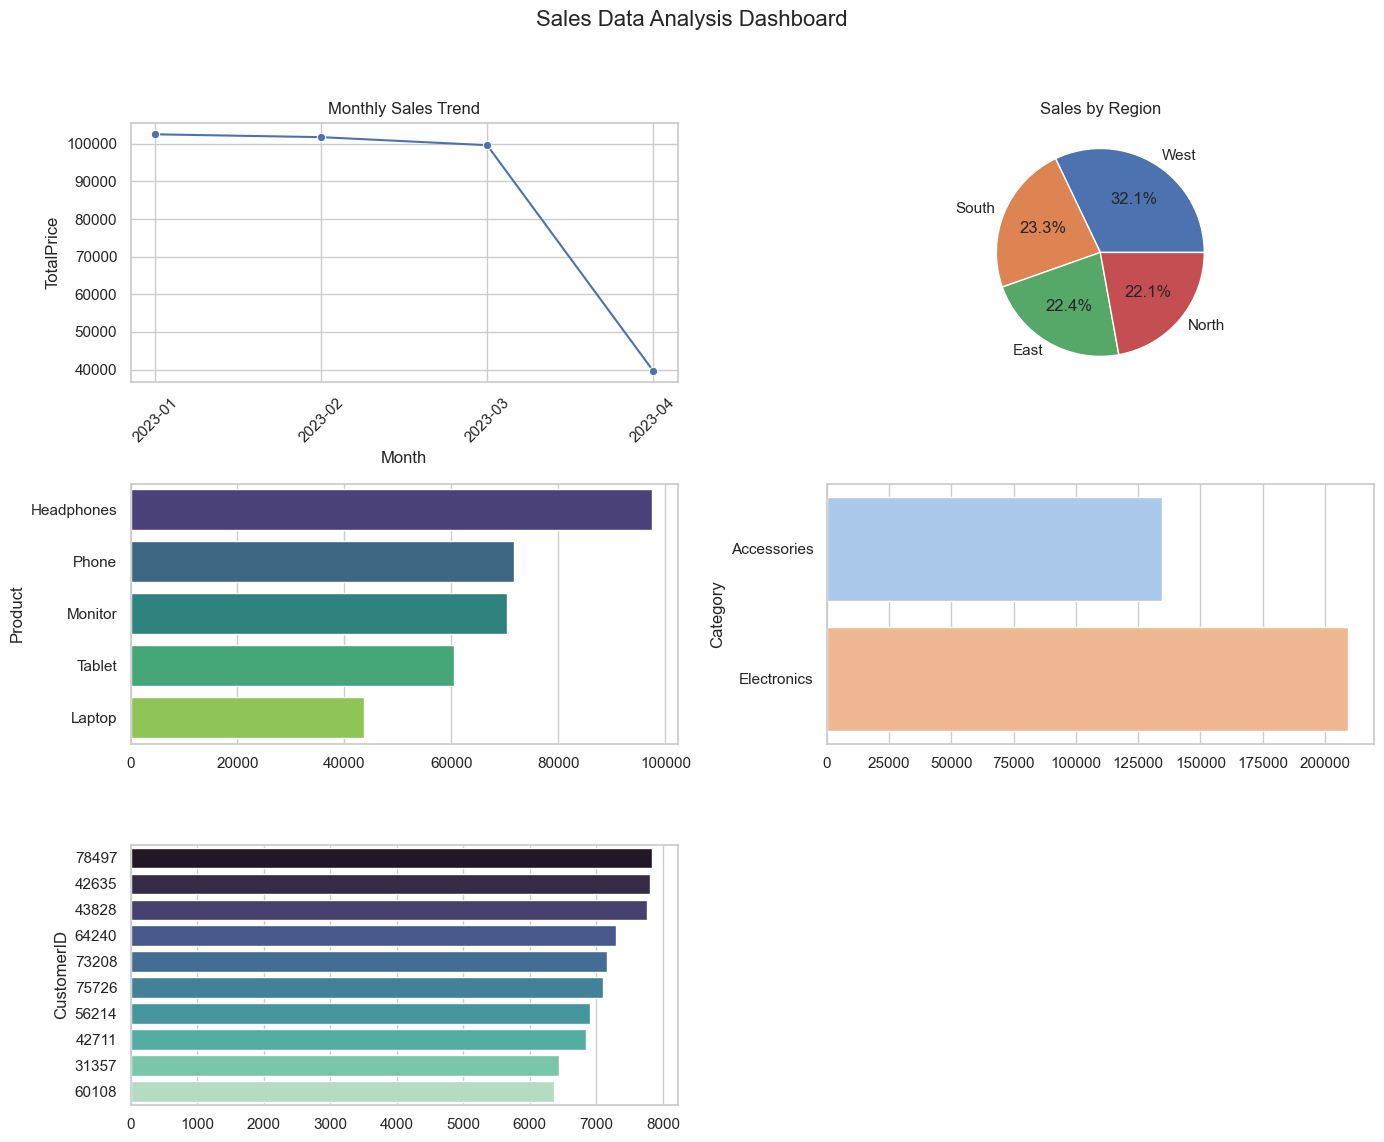

In [9]:
# Sales Data Analysis Project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("downloads/sample_sales_data.csv")

# Convert 'Date' column to datetime and extract 'Month'
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Set Seaborn style
sns.set(style="whitegrid")

# Basic statistics
print("\n--- Basic Info ---")
print(df.info())
print("\n--- Summary Statistics ---")
print(df.describe())

# Monthly sales trend
monthly_sales = df.groupby('Month')['TotalPrice'].sum().reset_index()

# Region-wise sales
region_sales = df.groupby('Region')['TotalPrice'].sum().sort_values(ascending=False)

# Product-wise sales
product_sales = df.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Category-wise sales
category_sales = df.groupby('Category')['TotalPrice'].sum()

# Top 10 customers by total spending
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Sales Data Analysis Dashboard', fontsize=16)

# 1. Monthly Sales Trend
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Monthly Sales Trend')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Region-wise Sales
region_sales.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1])
axes[0, 1].set_ylabel('')
axes[0, 1].set_title('Sales by Region')

# 3. Top Products
sns.barplot(x=product_sales.values, y=product_sales.index, hue=product_sales.index, dodge=False,
            ax=axes[1, 0], palette='viridis', legend=False)

# 4. Category Sales
sns.barplot(x=category_sales.values, y=category_sales.index, hue=category_sales.index, dodge=False,
            ax=axes[1, 1], palette='pastel', legend=False)

# 5. Top Customers
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), hue=top_customers.index.astype(str),
            dodge=False, ax=axes[2, 0], palette='mako', legend=False)

# 6. Hide empty subplot
axes[2, 1].axis('off')

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
